# CS 663 - Machine Learning Spring, 2024
## Assignment 04 - MLP (Multi-Layer Perceptron)

### Goals : 
1. To build a basic MLP in PyTorch and execute it against a real dataset.
2. To tune the MLP to get maximum performance.
3. To build a basic MLP from basic Python in order to deepen your understanding of neural networks.


### Dataset

- This dataset is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference Cortez et al., 2009.
- Ref: [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).


# Import data

In [1]:
import sys
sys.path.append("./modules")
from eda.eda import EDAAnalyzer
from feature_engineering import FeatureEngineer
from MLP import MLP
from MLP import MLPWrapper
from WineWualityDataLoader.wine_quality_data_loader import WineQualityDataset
import pandas as pd
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from MLP import CustomBuiltMLP

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

In [3]:
eda_analyzer = EDAAnalyzer(df)
eda_analyzer.display_shape()

'Shape of data: rows: 1599 cols: 12'

In [4]:
eda_analyzer.describe()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
eda_analyzer.display_column_info()

,Column Name,Non-null Count,Percent Non-null,Data Type
0,fixed acidity,1599,100.0,float64
1,volatile acidity,1599,100.0,float64
2,citric acid,1599,100.0,float64
3,residual sugar,1599,100.0,float64
4,chlorides,1599,100.0,float64
5,free sulfur dioxide,1599,100.0,float64
6,total sulfur dioxide,1599,100.0,float64
7,density,1599,100.0,float64
8,pH,1599,100.0,float64
9,sulphates,1599,100.0,float64


## Univariate Analysis

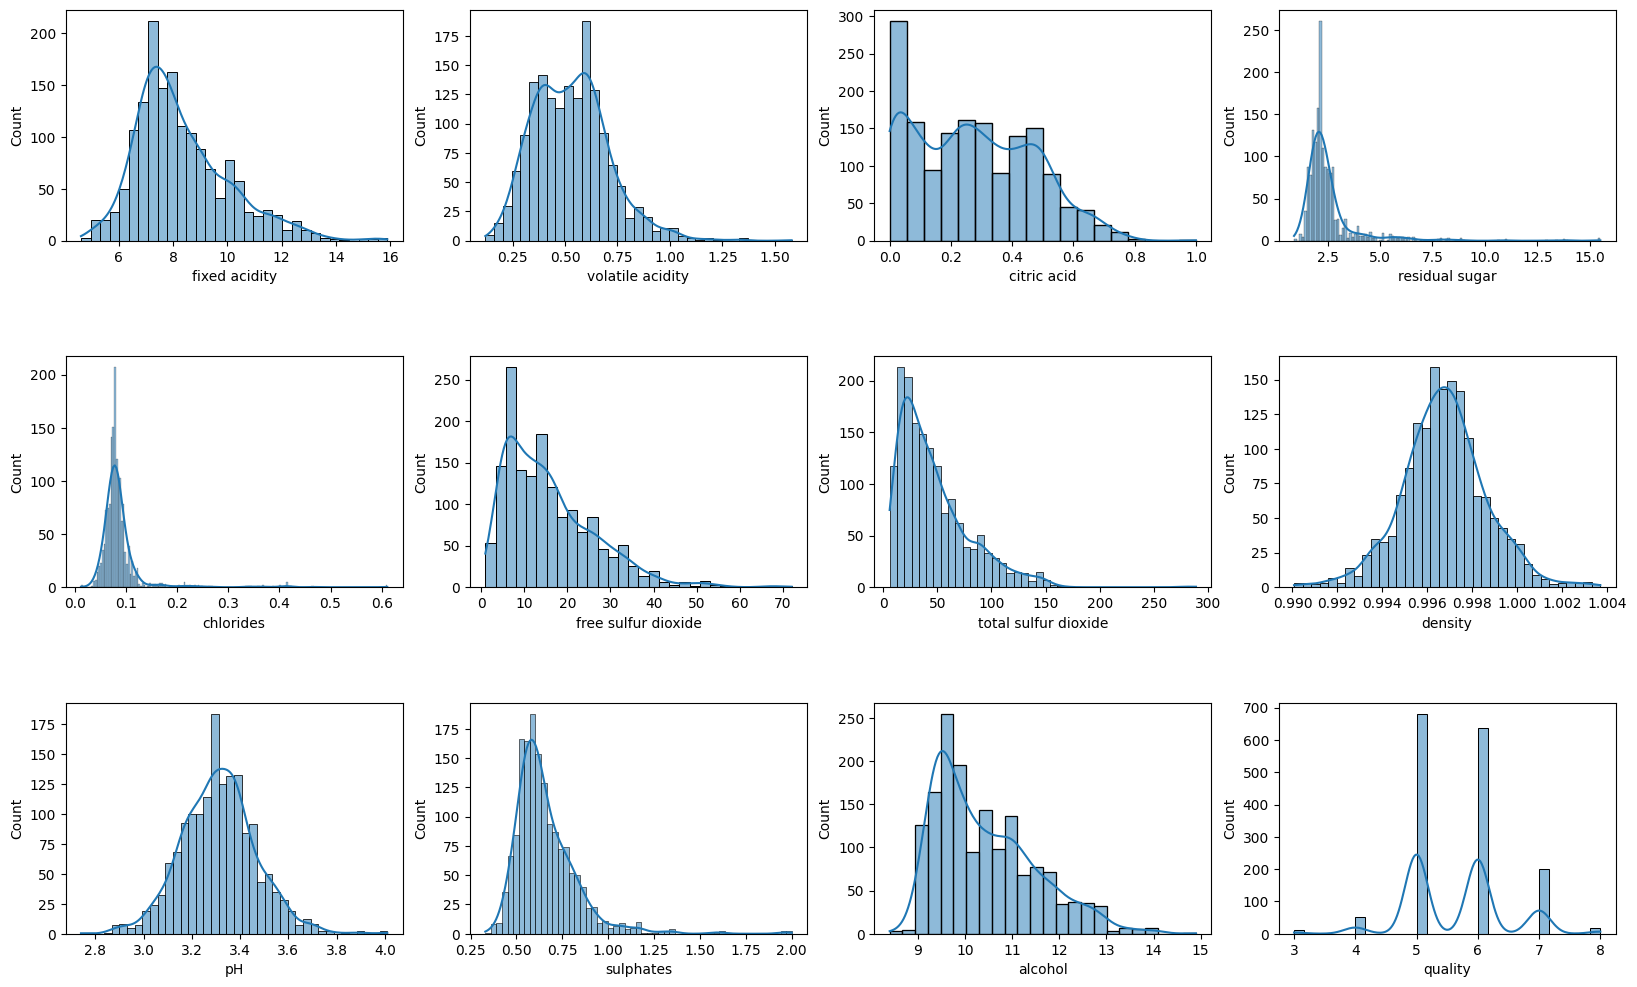

In [6]:
eda_analyzer.plot_histograms()

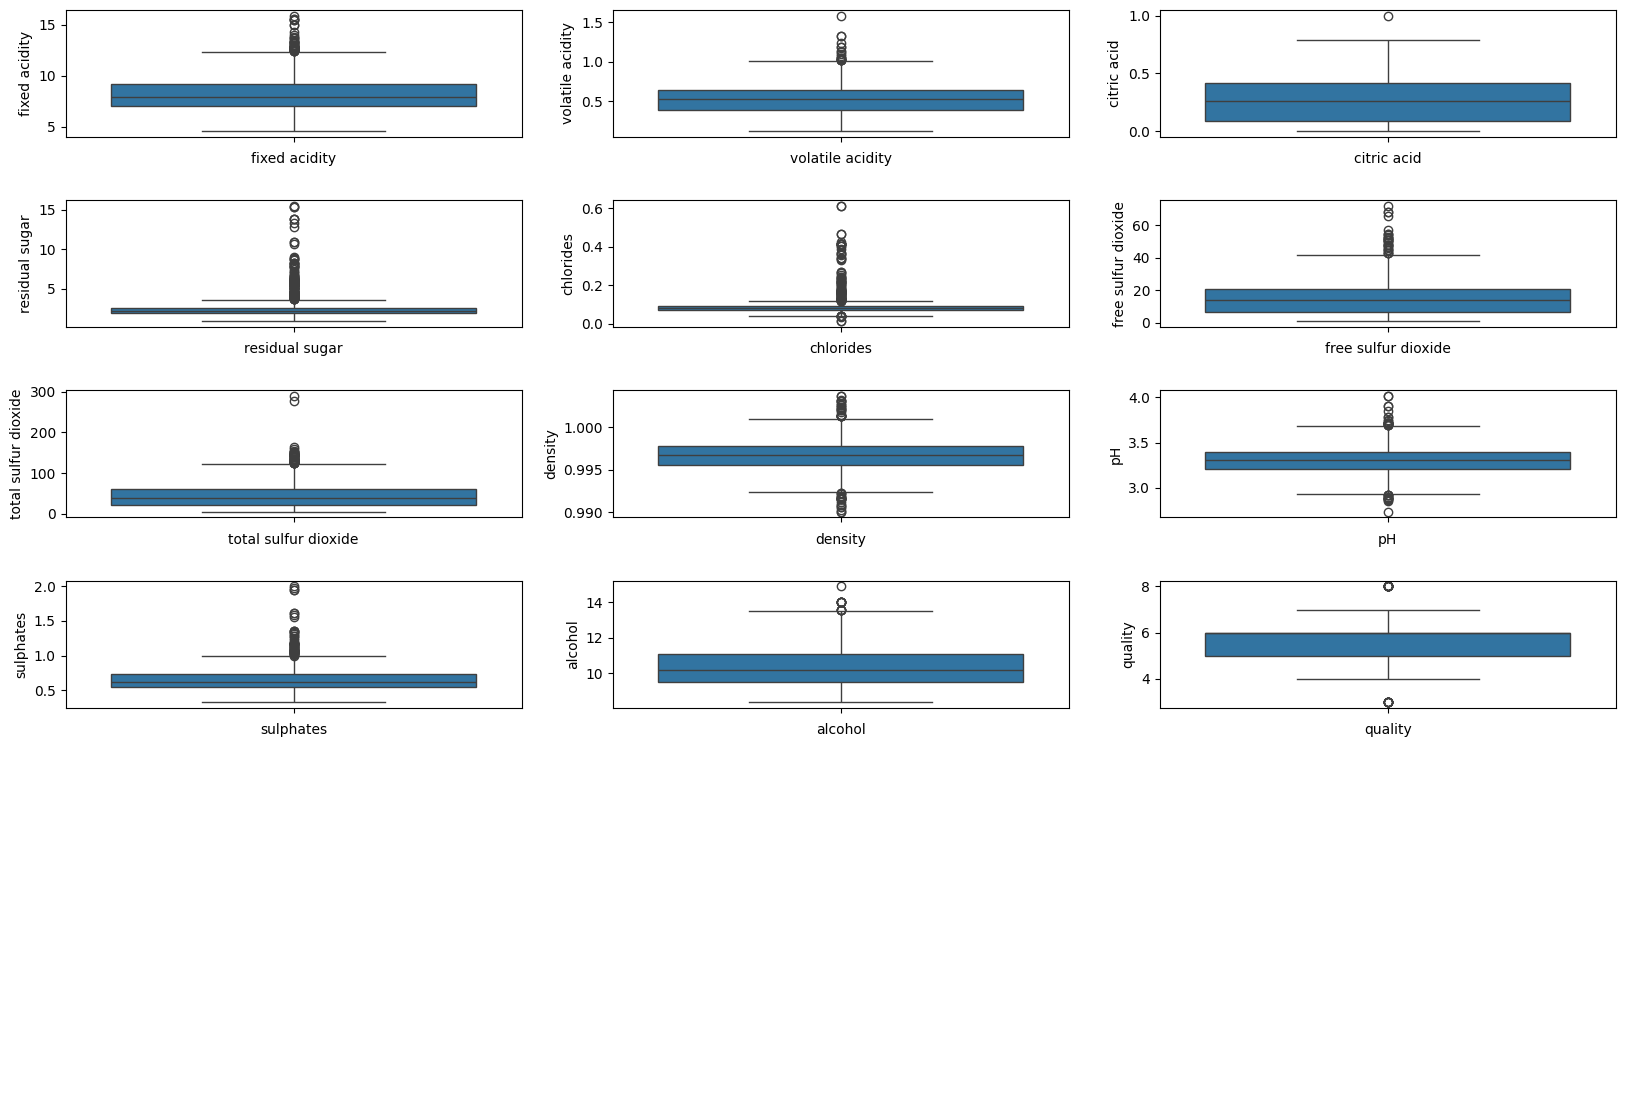

In [7]:
eda_analyzer.get_box_plot()

In [8]:
eda_analyzer.get_skew_kurt()

,Column Name,Skewness,Kurtosis,Category
5,free sulfur dioxide,1.250567,2.023562,Inbetween
0,fixed acidity,0.982751,1.132143,Normal Data
1,volatile acidity,0.671593,1.225542,Normal Data
2,citric acid,0.318337,0.788998,Normal Data
7,density,0.071288,0.934079,Normal Data
8,pH,0.193683,0.806943,Normal Data
10,alcohol,0.860829,0.200029,Normal Data
11,quality,0.217802,0.296708,Normal Data
3,residual sugar,4.540655,28.617595,Power Data
4,chlorides,5.680347,41.715787,Power Data


## Bivariate Analysis

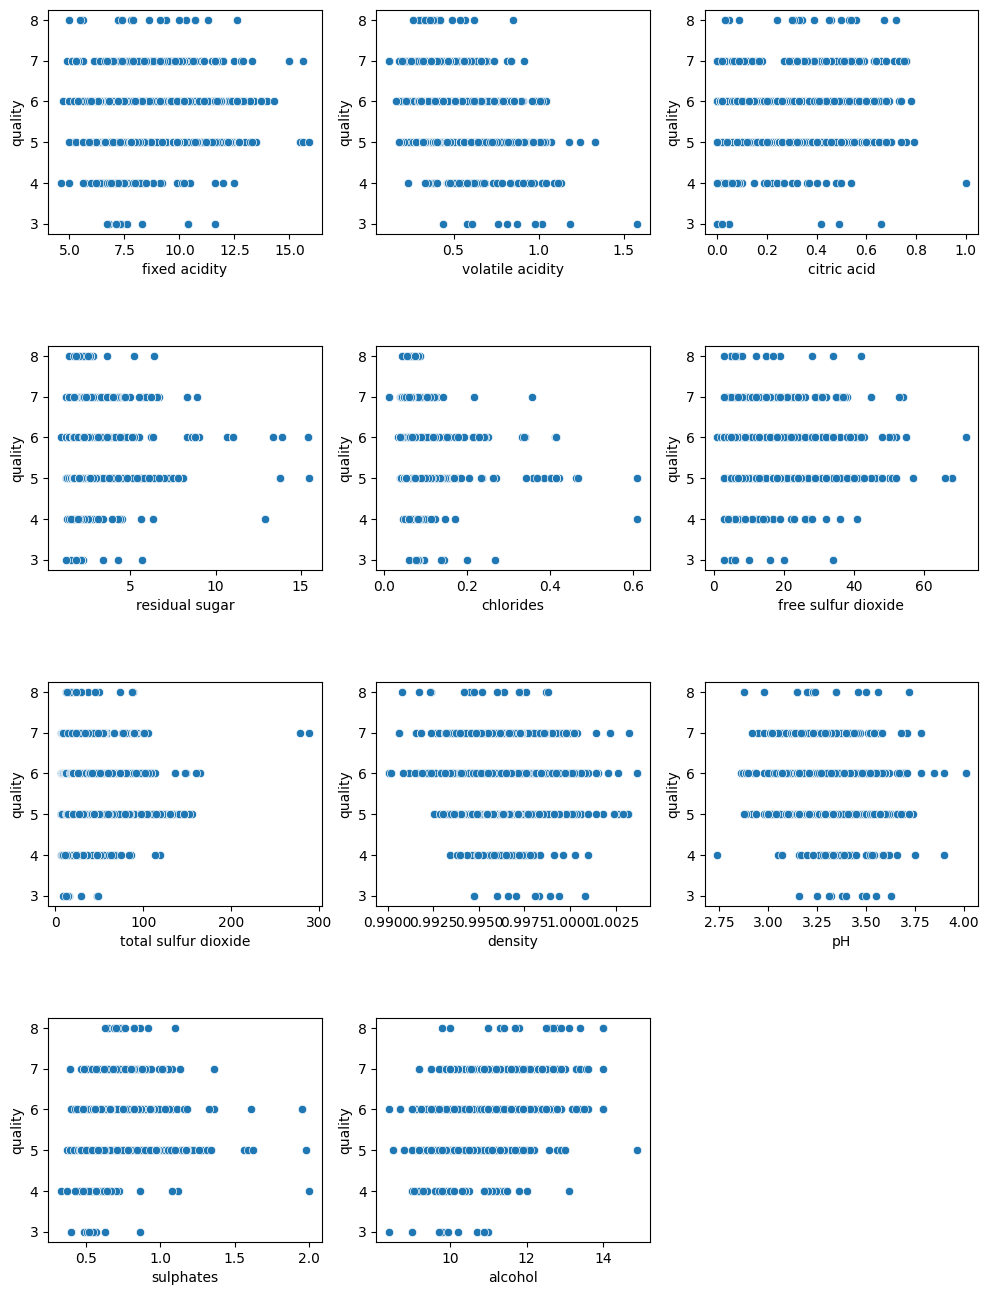

In [9]:
eda_analyzer.get_scatter_plot(["quality"])

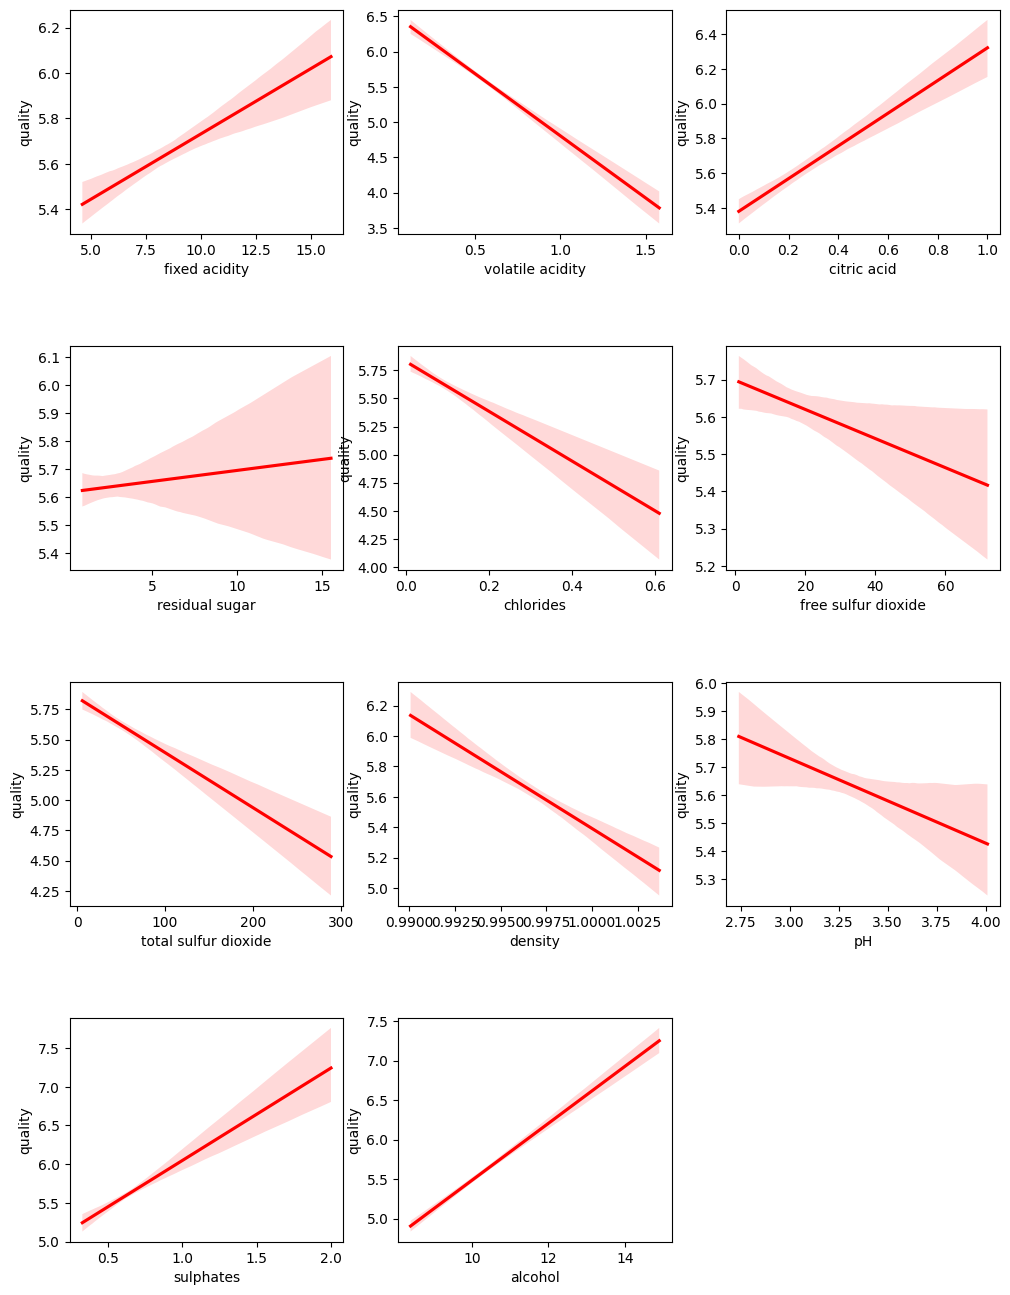

In [10]:
eda_analyzer.get_scatter_plot(["quality"],add_trend=True)

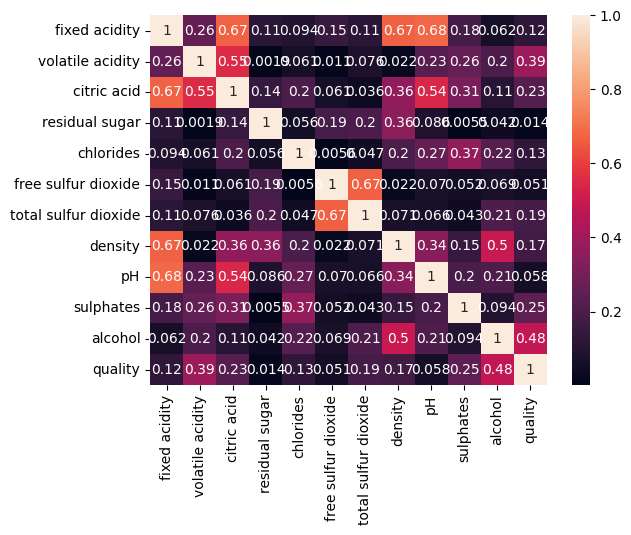

In [11]:
eda_analyzer.get_heat_map()

In [12]:
eda_analyzer.get_top_correlated_pairs_by_column(column_name="quality")

,Column 1,Column 2,Correlation Coefficient,Correlation Category
65,alcohol,quality,0.476166,Moderate
20,volatile acidity,quality,0.390558,Moderate
64,sulphates,quality,0.251397,Low
29,citric acid,quality,0.226373,Low
55,total sulfur dioxide,quality,0.185100,Low
59,density,quality,0.174919,Low
44,chlorides,quality,0.128907,Low
10,fixed acidity,quality,0.124052,Low
62,pH,quality,0.057731,Low
50,free sulfur dioxide,quality,0.050656,Low


## Data Quality Report

- **Dataset:** This dataset is related to red variants of the Portuguese "Vinho Verde" wine.

- **Shape of Data:** Rows: 1599, Columns: 12

- **Null Values:** No null values present. The range values of different columns seem appropriate.

- **Column Analysis:**
    - Columns 'residual sugar' and 'chlorides' have high-powered data shapes, while 'pH' and 'alcohol' exhibit a high normal distribution.
    - There doesn't appear to be much noise in the data as the columns follow these classifications.

- **Correlation:**
    - 'Volatile acidity' and 'alcohol' have a high correlation to quality, with minimal spread.
    - 'Residual sugar' and 'free sulfur dioxide' exhibit high spread out data from the regression line.

- **Input Variables (Based on Physicochemical Tests):**
    1. Fixed acidity
    2. Volatile acidity
    3. Citric acid
    4. Residual sugar
    5. Chlorides
    6. Free sulfur dioxide
    7. Total sulfur dioxide
    8. Density
    9. pH
    10. Sulphates
    11. Alcohol

- **Output Variable (Based on Sensory Data):**
    12. Quality (score between 0 and 10) - The dataset contains quality scores ranging from 3 to 8.


## Feature Engineering and train test split

In [13]:
featureEngineer = FeatureEngineer(df)

In [14]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = "quality"

In [15]:
featureEngineer.normalize_data(feature_list=features).head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777


In [16]:
train_x, val_x, test_x, train_y, val_y, test_y = featureEngineer.split_data_test_train_val(features,"quality",test_size=0.15,val_size=0.15)

In [17]:
train_dataset = WineQualityDataset(train_x, train_y)
val_dataset =  WineQualityDataset(val_x, val_y)
test_dataset =  WineQualityDataset(test_x, test_y)

In [18]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Creating a basic MLP

### Model config : 

In [19]:
n_inputs=train_x.shape[1]
hidden_size=5
n_outputs=1
activation=nn.ReLU()
learning_rate=0.0001
num_epochs = 50
num_layers=1

In [20]:
mlp_model = MLP(n_inputs=n_inputs, hidden_size=hidden_size,num_layers=num_layers, n_outputs=n_outputs, activation=activation, learning_rate=learning_rate)

In [21]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(mlp_model.parameters(), lr=0.0001)

In [22]:
mlp_wrapper = MLPWrapper(model=mlp_model, criterion=criterion, optimizer=optimizer)

In [23]:
train_lossesInit, val_lossesInit = mlp_wrapper.train_validate_curve(train_loader, val_loader, num_epochs=5,print_every=50)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will l

In [24]:
mlp_wrapper.train(train_loader, num_epochs=200)

Final Training Loss: 2.3171580904408504


In [25]:
test_loss_init = mlp_wrapper.evaluate(test_loader)
print(f"Test Loss: {test_loss_init}")

Test Loss: 2.394192695617676


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# Making changes to basic MLP

#### Hyperparameter Tuning

In [26]:
num_epochs_values = [300,500]
learning_rates = [0.001,0.0001]
hidden_sizes = [4,5,6,7]
num_layers_values = [2,3,4,6]

In [27]:
best_hyperparameters, best_loss, loss_df = mlp_wrapper.hyperparameter_tuning(train_loader, val_loader, 
                                                          num_epochs_values, learning_rates, 
                                                          hidden_sizes, num_layers_values,print_every=300)

Epoch 300/300, Train Loss: 0.7259668394138938, Val Loss: 0.6725101098418236
Epoch 300/300, Train Loss: 1.3955692868483693, Val Loss: 1.389325350522995
Epoch 300/300, Train Loss: 1.309421049921136, Val Loss: 1.1395686864852905
Epoch 300/300, Train Loss: 2.5998411178588867, Val Loss: 2.2520458102226257
Epoch 300/300, Train Loss: 0.8069751921452974, Val Loss: 0.7360584586858749
Epoch 300/300, Train Loss: 1.6549440653700578, Val Loss: 1.5377100259065628
Epoch 300/300, Train Loss: 0.9563308985609758, Val Loss: 0.8422607183456421
Epoch 300/300, Train Loss: 0.9591100310024462, Val Loss: 0.9469727575778961
Epoch 300/300, Train Loss: 0.7711880316859797, Val Loss: 0.7000511139631271
Epoch 300/300, Train Loss: 0.8844551193086725, Val Loss: 0.856485053896904
Epoch 300/300, Train Loss: 2.4224246175665605, Val Loss: 1.9898434281349182
Epoch 300/300, Train Loss: 1.3841771546163057, Val Loss: 1.1308774501085281
Epoch 300/300, Train Loss: 1.2028294676228573, Val Loss: 1.1248966306447983
Epoch 300/300, 

In [28]:
best_hyperparameters

{'num_epochs': 500, 'learning_rate': 0.001, 'hidden_size': 6, 'num_layers': 2}

In [29]:
best_loss

0.6058113649487495

### Track of the changes

In [30]:
loss_df

,num_epochs,learning_rate,hidden_size,num_layers,val_loss
0,300,0.0010,4,2,0.672510
1,300,0.0010,4,3,1.389325
2,300,0.0010,4,4,1.139569
3,300,0.0010,4,6,2.252046
4,300,0.0010,5,2,0.736058
...,...,...,...,...,...
59,500,0.0001,6,6,0.657575
60,500,0.0001,7,2,0.958734
61,500,0.0001,7,3,0.773980
62,500,0.0001,7,4,0.806693


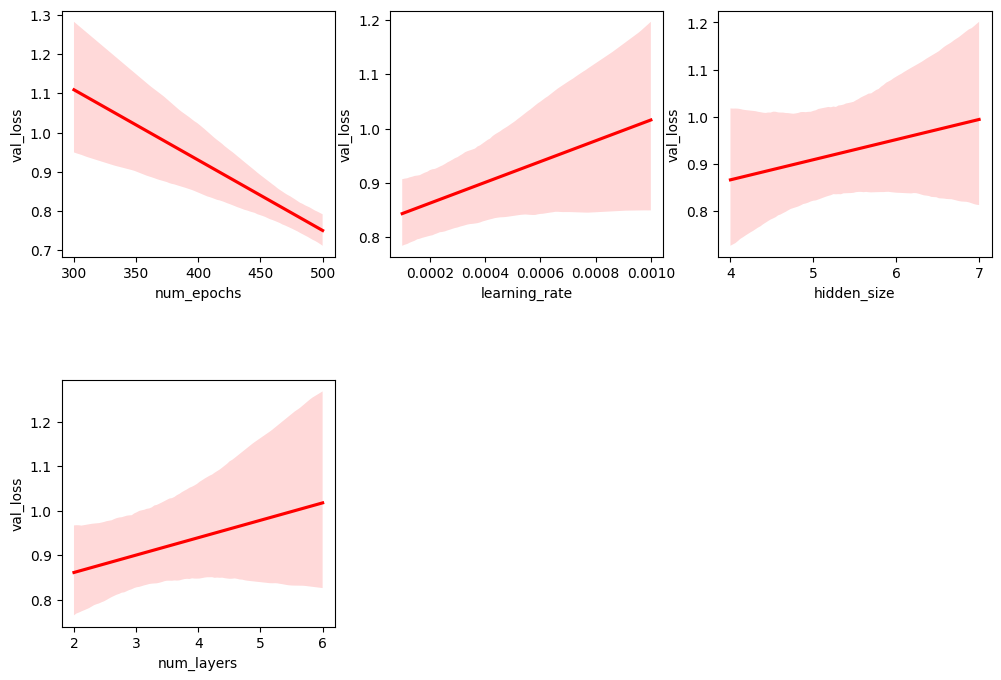

In [31]:
eda_analyzer_loss_df = EDAAnalyzer(loss_df)
eda_analyzer_loss_df.get_scatter_plot(y_cols=["val_loss"],add_trend=True)

In [32]:
pivot_table = pd.pivot_table(loss_df, values='val_loss', 
                              index=pd.cut(loss_df['num_epochs'], bins=2),
                              columns=[pd.cut(loss_df['learning_rate'], bins=2),
                                       pd.cut(loss_df['hidden_size'], bins=4),
                                       pd.cut(loss_df['num_layers'], bins=4)],
                              aggfunc='mean')

styled_table = pivot_table.style.background_gradient(cmap='coolwarm', axis=None)

styled_table

### Explanation of Performance Changes

- Initially, we conducted a random swarm-like search to explore the dataset.
- Analysis from the pivot table and plot yields the following insights:
    1. The proximity of targets suggests that a lower learning rate results in reduced validation loss, indicating that the search for the point of minimal occurrence is smooth.
    2. Increasing the number of hidden layers enhances performance, suggesting that some features are being effectively engineered. This aligns with the high interdependency among chemical columns.
    3. Fluctuations in the number of layers indicate the dataset's inability to absorb additional data, likely due to low data count and small bin size.
    4. The range of epochs demonstrates a trade-off between overfitting and convergence to a minimum, as evidenced by the fluctuating columns. This variability indicates successful selection of an optimal epoch range during the search process.


In [33]:
mlp_wrapper.set_hyperparameters(**best_hyperparameters)

In [34]:
mlp_wrapper.train(train_loader, num_epochs=best_hyperparameters['num_epochs'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Final Training Loss: 0.6883090922707006


In [35]:
test_loss_tuned = mlp_wrapper.evaluate(test_loader)
print("Final Test Loss:", test_loss_tuned)

Final Test Loss: 0.729549765586853


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Performance of Tuned Model

We observed a 70% improvement in the performance of our tuned model compared to our basic MLP. This improvement was achieved through careful tuning, considering the expected behavior of parameters in relation to the dataset and the problem statement.

- Tuning and Reasoning:
    - Through parameter tuning, we optimized the model's architecture and hyperparameters to better suit the characteristics of the dataset and address the requirements of the problem statement.
    - We anticipated the behavior of parameters based on the nature of the data and the specific challenges posed by the problem. This informed our decisions during the tuning process, allowing us to make adjustments that significantly enhanced the model's performance.


In [36]:
percent_change = -((test_loss_tuned - test_loss_init) / test_loss_init) * 100
print("Performance improvement Percent of tuned model in comparison with basic MLP:", round(percent_change,2), "%")

Performance improvement Percent of tuned model in comparison with basic MLP: 69.53 %


# Optional: Implementing the MLP

# Custom MLP Implementation Overview

## Features

- Custom MLP class with ReLU and Sigmoid activations
- Forward pass, backpropagation, and training methods
- Example usage for regression tasks

## Example Usage

- Load wine quality data
- Split, scale, and train the model
- Evaluate with MSE loss



In [37]:
X,Y = featureEngineer.get_features_targets(features,target)

In [38]:
train_x, test_x, train_y, test_y = featureEngineer.train_test_normalize_X_split(X, Y, test_size=0.2)

In [39]:
# model config
hidden_layer_tuple = (11, 5, 1)
activation_tuple = ('relu', 'sigmoid')

In [40]:
mlp = CustomBuiltMLP(hidden_layer_tuple, activation_tuple)

In [41]:
mlp.train(train_x, train_y, epochs=1000, learning_rate=0.00001)

In [42]:
train_loss = mlp.mse_loss(train_y, mlp.predict(train_x))
print("Train MSE Loss:", train_loss)

Train MSE Loss: 29.368734624955707


In [43]:
test_loss = mlp.mse_loss(test_y, mlp.predict(test_x))
print("Test MSE Loss:", test_loss)

Test MSE Loss: 29.985955853925287


# Report

## Error Analysis

The custom model shows a significant increase in error, which could be attributed to several factors:
- Lack of tuning: The model might not have been fine-tuned, leading to suboptimal performance.
- Data standardization: Standardizing the flow of data between neurons might not have been adequately addressed, impacting model stability and convergence.
- Other potential reasons: Unoptimized architecture, inappropriate choice of activation functions, or insufficient training data could also contribute to the observed error increase.

## Conclusion

In this report, we followed a structured approach:
1. **Part 1:** Built a basic MLP model.
2. **Part 2:** Tuned the model to enhance performance.
3. **Part 3:** Developed a custom model.

The observed error increase highlights the importance of thorough model evaluation, tuning, and custom model development for achieving optimal performance.
